# Laboratorio No. 2 - Deep Learning

### Manuel Rodas - 21509 / Sebastian Solorzano - 21826

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.layers import Dropout # type: ignore
from tensorflow.keras.layers import BatchNormalization, LeakyReLU # type: ignore 

### Carga y preparación de datos

In [3]:
df = pd.read_csv('movie_statistic_dataset.csv')

columns = ['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'Production budget $', 'Domestic gross $', 'Worldwide gross $', 'approval_Index']
df = df[columns]
df = df.dropna()

X = df.drop('approval_Index', axis=1).values
y = df['approval_Index'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelo No. 1

In [4]:
model1 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

history1 = model1.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=2)

c:\Users\50242\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
88/88 - 2s - 20ms/step - loss: 11.6914 - mae: 2.9792 - val_loss: 3.6665 - val_mae: 1.4920
Epoch 2/50
88/88 - 0s - 2ms/step - loss: 2.7113 - mae: 1.2760 - val_loss: 2.2719 - val_mae: 1.1517
Epoch 3/50
88/88 - 0s - 2ms/step - loss: 1.6757 - mae: 0.9822 - val_loss: 1.4491 - val_mae: 0.8945
Epoch 4/50
88/88 - 0s - 3ms/step - loss: 1.0364 - mae: 0.7500 - val_loss: 0.9536 - val_mae: 0.6816
Epoch 5/50
88/88 - 0s - 3ms/step - loss: 0.6533 - mae: 0.5790 - val_loss: 0.6552 - val_mae: 0.5470
Epoch 6/50
88/88 - 0s - 2ms/step - loss: 0.4368 - mae: 0.4555 - val_loss: 0.4717 - val_mae: 0.4235
Epoch 7/50
88/88 - 0s - 2ms/step - loss: 0.3095 - mae: 0.3715 - val_loss: 0.3771 - val_mae: 0.3710
Epoch 8/50
88/88 - 0s - 2ms/step - loss: 0.2408 - mae: 0.3052 - val_loss: 0.3152 - val_mae: 0.3254
Epoch 9/50
88/88 - 0s - 2ms/step - loss: 0.2022 - mae: 0.2727 - val_loss: 0.2764 - val_mae: 0.2978
Epoch 10/50
88/88 - 0s - 3ms/step - loss: 0.1801 - mae: 0.2541 - val_loss: 0.2566 - val_mae: 0.2598
Epoch 1

### Modelo No. 2

In [5]:
model2 = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='tanh'),
    Dropout(0.3),
    Dense(32, activation='tanh'),
    Dense(1)
])

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=2)

Epoch 1/50
88/88 - 2s - 18ms/step - loss: 11.0299 - mae: 2.6995 - val_loss: 0.6945 - val_mae: 0.6198
Epoch 2/50
88/88 - 0s - 3ms/step - loss: 0.6860 - mae: 0.6151 - val_loss: 0.3493 - val_mae: 0.3528
Epoch 3/50
88/88 - 0s - 3ms/step - loss: 0.5268 - mae: 0.5253 - val_loss: 0.3715 - val_mae: 0.3390
Epoch 4/50
88/88 - 0s - 3ms/step - loss: 0.4337 - mae: 0.4654 - val_loss: 0.3333 - val_mae: 0.3172
Epoch 5/50
88/88 - 0s - 3ms/step - loss: 0.3532 - mae: 0.4193 - val_loss: 0.3345 - val_mae: 0.3024
Epoch 6/50
88/88 - 0s - 2ms/step - loss: 0.3173 - mae: 0.3845 - val_loss: 0.2888 - val_mae: 0.2745
Epoch 7/50
88/88 - 0s - 3ms/step - loss: 0.2870 - mae: 0.3682 - val_loss: 0.2752 - val_mae: 0.2790
Epoch 8/50
88/88 - 0s - 3ms/step - loss: 0.2666 - mae: 0.3424 - val_loss: 0.2680 - val_mae: 0.2571
Epoch 9/50
88/88 - 0s - 2ms/step - loss: 0.2467 - mae: 0.3338 - val_loss: 0.2553 - val_mae: 0.2341
Epoch 10/50
88/88 - 0s - 3ms/step - loss: 0.2405 - mae: 0.3258 - val_loss: 0.2415 - val_mae: 0.2307
Epoch 1

### Modelo No. 3

In [6]:
model3 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dense(1)
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=2)

Epoch 1/50


c:\Users\50242\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


88/88 - 2s - 28ms/step - loss: 13.9526 - mae: 3.6149 - val_loss: 15.3674 - val_mae: 3.8200
Epoch 2/50
88/88 - 0s - 3ms/step - loss: 4.4056 - mae: 1.9804 - val_loss: 4.9842 - val_mae: 2.1491
Epoch 3/50
88/88 - 0s - 3ms/step - loss: 1.0118 - mae: 0.8438 - val_loss: 1.4018 - val_mae: 1.0965
Epoch 4/50
88/88 - 0s - 3ms/step - loss: 0.3569 - mae: 0.4565 - val_loss: 0.5306 - val_mae: 0.5779
Epoch 5/50
88/88 - 0s - 3ms/step - loss: 0.3053 - mae: 0.4014 - val_loss: 0.2965 - val_mae: 0.3654
Epoch 6/50
88/88 - 0s - 3ms/step - loss: 0.3020 - mae: 0.4045 - val_loss: 0.2635 - val_mae: 0.3351
Epoch 7/50
88/88 - 0s - 3ms/step - loss: 0.2759 - mae: 0.3788 - val_loss: 0.2402 - val_mae: 0.3263
Epoch 8/50
88/88 - 0s - 3ms/step - loss: 0.2640 - mae: 0.3708 - val_loss: 0.2229 - val_mae: 0.2808
Epoch 9/50
88/88 - 0s - 3ms/step - loss: 0.2393 - mae: 0.3565 - val_loss: 0.2409 - val_mae: 0.2617
Epoch 10/50
88/88 - 0s - 4ms/step - loss: 0.2347 - mae: 0.3480 - val_loss: 0.2665 - val_mae: 0.2740
Epoch 11/50
88/88

### Resultados

In [7]:
def plot_metrics(histories, metric):
    for i, history in enumerate(histories):
        plt.plot(history.history[metric], label=f'Train {metric} Model {i+1}')
        plt.plot(history.history['val_' + metric], label=f'Val {metric} Model {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

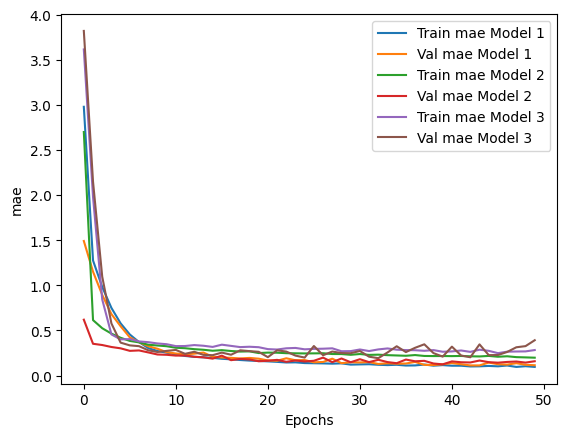

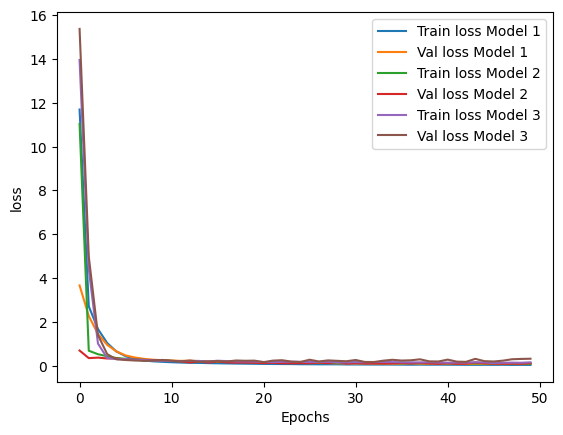

In [8]:
histories = [history1, history2, history3]
plot_metrics(histories, 'mae')
plot_metrics(histories, 'loss')

In [9]:
test_results = {}
for i, model in enumerate([model1, model2, model3]):
    test_results[f'Model {i+1}'] = model.evaluate(X_test, y_test, verbose=2)
print(test_results)

28/28 - 0s - 2ms/step - loss: 0.0446 - mae: 0.1005
28/28 - 0s - 2ms/step - loss: 0.0903 - mae: 0.1524
28/28 - 0s - 2ms/step - loss: 0.2638 - mae: 0.3765
{'Model 1': [0.04462653025984764, 0.1005285233259201], 'Model 2': [0.09026539325714111, 0.15242497622966766], 'Model 3': [0.26381784677505493, 0.376535564661026]}


In [12]:
preds1 = model1.predict(X_test)
preds2 = model2.predict(X_test)
preds3 = model3.predict(X_test)

print("Predicciones del modelo 1: ", preds1[:5])
print("Predicciones del modelo 2: ", preds2[:5])
print("Predicciones del modelo 3: ", preds3[:5])

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicciones del modelo 1:  [[6.77077  ]
 [3.5727448]
 [3.4434428]
 [5.262508 ]
 [7.1740594]]
Predicciones del modelo 2:  [[7.2708526]
 [3.7031598]
 [3.3487315]
 [5.4049726]
 [7.314559 ]]
Predicciones del modelo 3:  [[6.5633245]
 [3.9498956]
 [3.8976326]
 [5.2795424]
 [6.687595 ]]


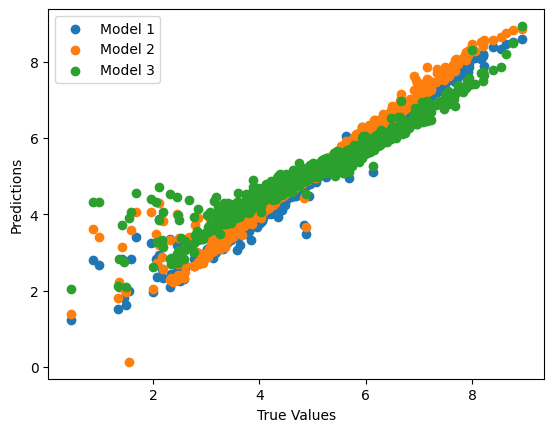

In [13]:
plt.scatter(y_test, preds1, label='Model 1')
plt.scatter(y_test, preds2, label='Model 2')
plt.scatter(y_test, preds3, label='Model 3')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()